# <p style="padding:15px;background:yellow;text-align:center;text-decoration:underline">Assigment 7<p>

### - Import Libraries

Import necessary libraries used in these assignment.

In [111]:
import numpy as np
import pandas as pd
import math
import sys
import operator
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import KFold

### - Read File (without header) given a delimeter

Reads a file with a given delimeter and returns the converted numpy array.
<br>
Default when no delimeter is given it reads file as in csv format.

In [2]:
def readFile(trainFile,seperator=",",sample=False):
    try:
        data=pd.read_csv(trainFile, sep=seperator, header=None)
        if sample:
            data=data.sample(frac=1)
        return data.values
    except:
        print("Error reading training data file")

### -Train Test split

Given a percentage, it will split out the data into train dataset and test dataset.

In [3]:
def splitTrainTest(data,percent):
    total=len(data)
    trainTotal=int(total*percent*0.01)
    testTotal=total-trainTotal
    return (data[0:trainTotal],data[trainTotal:total])

### -Mean square error as error measure

Following **Error Measure** have been used to perform the various kinds of regressions.

<!--**Mean Absolute Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}|y_{actual}-y_{predicted} | $$
<hr>-->

**Mean Square Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}(y_{actual}-y_{predicted} ){^2} $$

<!--<hr>
**Mean Percentage Error:**
$$ MAE = \frac{100\%}{n}\sum_{\forall y}\frac{(y_{actual}-y_{predicted} )}{y_{actual}} $$-->


In [5]:
# function return Mean square error
def MSE(testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=(actual-predicted)**2
#     print("Mean Square Error = ",error/len(testYs))
    return error/len(testYs)

<hr>

## Question-1-Part-1
### Lasso regression

As we know to calculate the value of dependent variable $Y$ we can use the below general equation:

$$Y=\theta_{0}+\theta_{1}X_1+\theta_{2}X_2+....+\theta_{n}X_n+\epsilon$$

But complicated hypothesis may lead to the overfitting which affect the performance of our model on validation or unseen data.

Thus the variation of linear regression i.e. **Lasso regression** is used which penalizes the hypothesis complexity by using a tradeoff parameter $\lambda $ to prevent overfitting.  This is called regularization and the parameter $\lambda $ is called regularization coefficent.<br>
Thus we will find the optimal values of $\theta$ by minimising the new Cost function:

$$ \theta^{Lasso} = \arg\min_{\theta}  \left\{ || X\theta - y  ||_2^2 + \lambda || \theta ||_1 \right\} $$

Thus our new cost function which we have to minimize becomes:

$$J(\theta) =  || X\theta - y ||_2^2 + \lambda || \theta ||_1  $$

or,

$$J(\theta) =  ( X\theta - y)^{T}(X\theta - y ) + \lambda\theta   $$

Then we minimize above cost function by **gradient decent algorithm** to find optimal $\theta$.<br>

$$\frac{\partial{J}}{\partial{\theta}} = 2X^{T}y + 2X^{T}X{\theta} + \lambda sign(\theta)$$


While calculating the regularization we dont consider the weight of coefficent corresponding to bias.


In [357]:
def linearRegressionLasso(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
#     data=data.sample(frac=1).values
    independentVariable=[0]+independentVariable
    
    train,test=splitTrainTest(data,percent)
    
    if testFile:
        print("Will evaluate test File: ",testFile)
        test=pd.read_csv(testFile).values
    else:
        print("Will evaluate Validation data (20%): ")
    
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    train=(train-train.mean(axis=0))/(train.std(axis=0))
    test=(test-test.mean(axis=0))/(test.std(axis=0))
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    
    test=test[:,independentVariable]

        
    mseErrorsValid=[]
    mseErrorsTrain=[]
#     lambdaVal=[i for i in range(50)]
    lambdaVal=np.linspace(1,50,500)
    
    trainY=trainY.reshape(-1,1)
    testY=testY.reshape(-1,1)
    m=len(trainY)
    for lambdaV in lambdaVal:
        learningR=0.01
        epochs=1000
        theta=np.zeros((train.shape[1],1))
        
        for i in range(epochs):
            predictions=np.dot(train,theta)
            diff=(predictions-trainY)
            temp=theta[0]
#             deri=(train.T.dot(diff))*2/m+lambdaV*np.sign(theta)
            deri=((train.T.dot(diff))+lambdaV*np.sign(theta))
            theta=theta-learningR*(deri)*2/m
            theta[0]=theta[0]+learningR*lambdaV*np.sign(temp)*2/m
#             theta=theta-(1/m)*learningR*(train.T.dot((predictions-trainY))+lambdaV*np.sign(theta))
        predictedTrain=np.dot(train,theta)
        predictedValid=np.dot(test,theta)
        mseErrorsValid.append(MSE(testY,predictedValid))
        mseErrorsTrain.append(MSE(trainY,predictedTrain))
    print("Optimal value of lambda: ",lambdaVal[np.argmin(mseErrorsValid)])
    plt.figure(figsize=(8,6))
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.xlabel("regularisation coefficient λ")
    plt.ylabel("Error (MSE)")
    plt.grid(True)
    plt.plot(lambdaVal,mseErrorsValid,color="orange",linewidth="2.4",label="Validation")
    plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    plt.title("Lasso regression",fontsize=15)
    plt.legend(loc=0,fontsize=15)
    plt.show()



Will evaluate Validation data (20%): 
Optimal value of lambda:  1.0


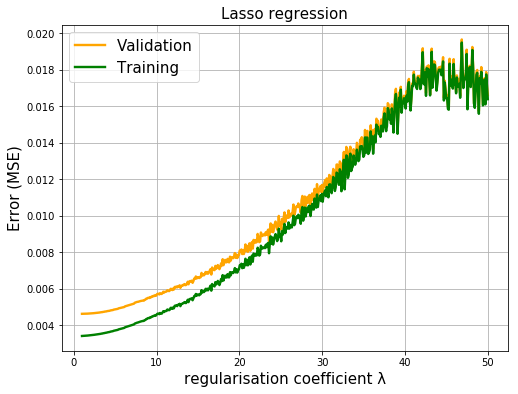

In [358]:
linearRegressionLasso(trainFile="AdmissionDataset/data.csv",percent=80)
#with test file as last parameter
# linearRegressionLasso("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")

<hr>

## Question-1-Part-2 
### Ridge regression

As we know to calculate the value of dependent variable $Y$ we can use the below general equation:

$$Y=\theta_{0}+\theta_{1}X_1+\theta_{2}X_2+....+\theta_{n}X_n+\epsilon$$

In ordinary least squares, the regression coefficients are estimated using the formula matrix calculus
$$\theta=((X{^T}X)^{-1}X{^T}Y)$$

But complicated hypothesis may lead to the overfitting which affect the performance of our model on validation or unseen data.

Thus the variation of linear regression i.e. **Ridge regression** is used which penalizes the hypothesis complexity by using a tradeoff parameter $\lambda $ to prevent overfitting.  This is called regularization and the parameter $\lambda $ is called regularization coefficent.<br>
Thus we will find the optimal values of $\theta$ by minimising the new Cost function:

$$ \theta^{Ridge} = \arg\min_{\theta}  \left\{ || X\theta - y ||_2^2 + \lambda || \theta ||_2^2 \right\} $$

In matrix form we will get the $\theta$ for ridge regression as:

<hr>

$$\theta=((X{^T}X + \lambda I)^{-1}X{^T}Y)$$

<hr>

While calculating the regularization we dont consider the weight of coefficent corresponding to bias therefore we make the first digonal element of correlation matrix , $I$, zero


In [338]:
def linearRegressionRidge(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile)
    data=data.sample(frac=1).values
    independentVariable=[0]+independentVariable
    
    train,test=splitTrainTest(data,percent)
    
    if testFile:
        print("Will evaluate test File: ",testFile)
        test=pd.read_csv(testFile).values
    else:
        print("Will evaluate Validation data (20%): ")
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    test=test[:,independentVariable]
   
    mseErrorsValid=[]
    mseErrorsTrain=[]
    lambdaVal=[i for i in range(0,200)]
#     lambdaVal=np.linspace(0,1,100)
    for i in lambdaVal:
        y=np.transpose(np.matrix(trainY))
        X=np.matrix(train)
        XT=np.transpose(X)
        iden=np.identity(XT.shape[0])*i
        iden[0][0]=0
        inverse=np.linalg.inv(XT*X+iden)
        coefficents=inverse*XT*y
        predictedValid=np.array(test*coefficents)
        predictedTrain=np.array(train*coefficents)
        mseErrorsValid.append(MSE(testY,predictedValid))
        mseErrorsTrain.append(MSE(trainY,predictedTrain))
    
    plt.figure(figsize=(8,6))
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.xlabel("regularisation coefficient λ")
    plt.ylabel("Error (MSE)")
    plt.title("Ridge regression",fontsize=15)
    plt.grid(True)
    plt.plot(lambdaVal,mseErrorsValid,color="orange",linewidth="2.4",label="Validation")
    plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    print("Optimal value of lambda (for Validation): ",lambdaVal[np.argmin(mseErrorsValid)])
    plt.legend(loc=4,fontsize=15)
    plt.show()


Will evaluate Validation data (20%): 
Optimal value of lambda (for Validation):  10


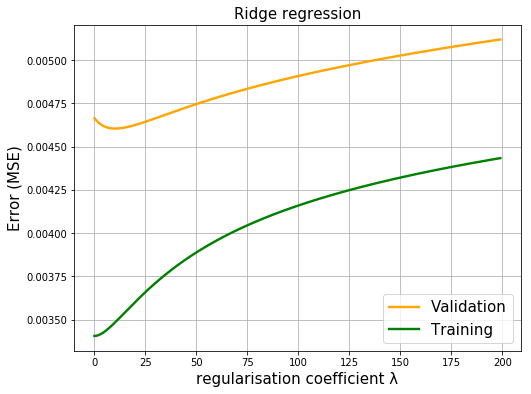

In [337]:
linearRegressionRidge(trainFile="AdmissionDataset/data.csv",percent=80)

#with test file as last parameter
# linearRegressionRidge("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")

<hr>

## Question-1-Part-3
### Analyse how the hyper-parameter λ plays a role in deciding between bias and variance

- In regression, we can make this trade-off with **regularization**, which means placing constraints on the coefficients.

- In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j.
 
- `λ` is a regularization parameter controls the size of coefficient and the amount of regularization. It must be properly tuned else the overfitted model which we aim to use regularization to correct will turn out to be underfittted. This can be observed in the graphs above in the case when λ becomes very high.

- **If λ = 0, we obtain the least squares solutions. (High variance overfitted model)**
- **As λ = ∞, we have $β_{ridge} = 0$ ,we obtain a intercept-only model. (High biased underfitted model)**
- **Positive value of λ will cause the magnitude of weights to be smaller than the usual linear solution.**


- Thus if we increase the value of λ we are penalizing the overfitted model to reduce the high variance but at the same time we are **increasing the bias.**
- Thus we need some way to choose the optimal value of λ.

#### Thus how can we choose λ? 
- Ridge Regression Cross Validation can be used to select the best value of λ to use in order to ensure the best model is selected.



<hr>

## Question-1-Part-4
### Analyse how the two different regularisation techniques affect regression weights in terms of their values and what are the differences between the two.

Below subgraphs shows the effect of different regularization techniques affecting the regression weights for different value of regularization coefficents.

**We have done the ridge regression using the matrix equations**

**We have done the lasso regression using the gradient decent**

Ridge Regression effect of lamda on regression weights
Will evaluate Validation data (20%): 


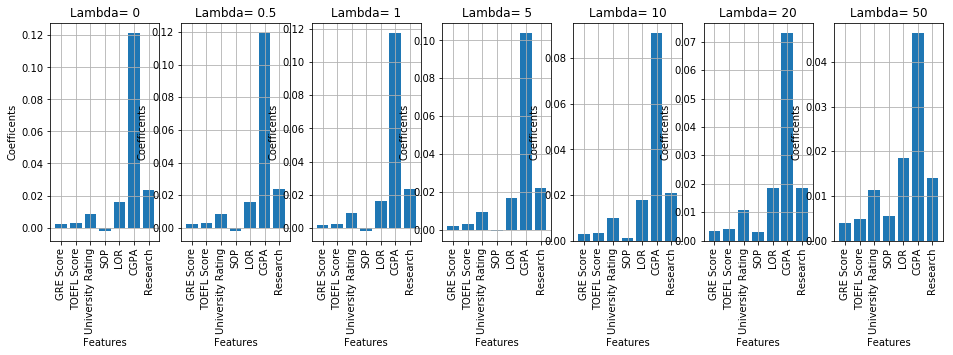

Lasso Regression effect of lamda on regression weights
Will evaluate Validation data (20%): 


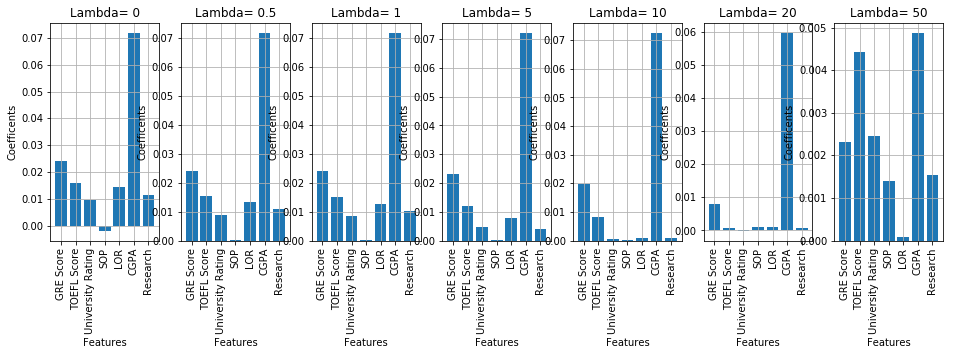

In [359]:
def weightLambdaRidge(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
#     data=data.sample(frac=1)
    independentVariable=[0]+independentVariable
    features=["GRE Score","TOEFL Score","University Rating","SOP","LOR" ,"CGPA","Research"]

    train,test=splitTrainTest(data,percent)
    
    if testFile:
        print("Will evaluate test File: ",testFile)
        test=pd.read_csv(testFile).values
    else:
        print("Will evaluate Validation data (20%): ")
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    test=test[:,independentVariable]
   
    mseErrorsValid=[]
    mseErrorsTrain=[]
#     lambdaVal=[i for i in range(0,10)]
    lambdaVal=[0,0.5,1,5,10,20,50]
    coeffList=[]
    for i in lambdaVal:
        y=np.transpose(np.matrix(trainY))
        X=np.matrix(train)
        XT=np.transpose(X)
        iden=np.identity(XT.shape[0])*i
        iden[0][0]=0
        inverse=np.linalg.inv(XT*X+iden)
        coefficents=inverse*XT*y
        predictedValid=np.array(test*coefficents)
        predictedTrain=np.array(train*coefficents)
        mseErrorsValid.append(MSE(testY,predictedValid))
        mseErrorsTrain.append(MSE(trainY,predictedTrain))
        coeffList.append(coefficents.reshape(1,8).tolist()[0][1:])
    
    fig=plt.figure(figsize=(16, 4))
    i=1
    for coeff,lamVal in zip(coeffList,lambdaVal):  
        ax=fig.add_subplot( 1, len(lambdaVal),i)
        ax.set_title("Lambda= "+str(lamVal))
        ax.grid(True)
        ax.set_xlabel("Features")
        ax.set_ylabel("Coefficents")
        plt.bar(features, coeff)
        i+=1
        plt.xticks(features, rotation=90)
    plt.show()
        
print("Ridge Regression effect of lamda on regression weights")
weightLambdaRidge("AdmissionDataset/data.csv",80)


def weightLambdaLasso(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
#     data=data.sample(frac=1)
    independentVariable=[0]+independentVariable
    features=["GRE Score","TOEFL Score","University Rating","SOP","LOR" ,"CGPA","Research"]
    train,test=splitTrainTest(data,percent)
    
    if testFile:
        print("Will evaluate test File: ",testFile)
        test=pd.read_csv(testFile).values
    else:
        print("Will evaluate Validation data (20%): ")
    
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    train=(train-train.mean(axis=0))/(train.std(axis=0))
    test=(test-test.mean(axis=0))/(test.std(axis=0))
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    
    test=test[:,independentVariable]

        
    mseErrorsValid=[]
    mseErrorsTrain=[]
#     lambdaVal=[i for i in range(5)]
    lambdaVal=[0,0.5,1,5,10,20,50]
#     lambdaVal=np.linspace(1,20,200)
    coeffList=[]
    trainY=trainY.reshape(-1,1)
    testY=testY.reshape(-1,1)
    m=len(trainY)
    for lambdaV in lambdaVal:
        learningR=0.01
        epochs=1000
        theta=np.zeros((train.shape[1],1))
        
        for i in range(epochs):
            predictions=np.dot(train,theta)
            diff=(predictions-trainY)
            temp=theta[0]
#             deri=(train.T.dot(diff))*2/m+lambdaV*np.sign(theta)
            deri=((train.T.dot(diff))+lambdaV*np.sign(theta))
            theta=theta-learningR*(deri)*2/m
            theta[0]=theta[0]+learningR*lambdaV*np.sign(temp)*2/m
        predictedTrain=np.dot(train,theta)
        predictedValid=np.dot(test,theta)
        mseErrorsValid.append(MSE(testY,predictedValid))
        mseErrorsTrain.append(MSE(trainY,predictedTrain))
        coeffList.append(theta.reshape(1,8).tolist()[0][1:])
    fig=plt.figure(figsize=(16, 4))
    i=1
    for coeff,lamVal in zip(coeffList,lambdaVal):  
        ax=fig.add_subplot( 1, len(lambdaVal),i)
        ax.set_title("Lambda= "+str(lamVal))
        ax.grid(True)
        ax.set_xlabel("Features")
        ax.set_ylabel("Coefficents")
        plt.bar(features, coeff)
        i+=1
        plt.xticks(features, rotation=90)
    plt.show()

print("Lasso Regression effect of lamda on regression weights")
weightLambdaLasso("AdmissionDataset/data.csv",80)

<hr>

## Question-1-Part-5
### k-Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

It estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
    4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

**Three common tactics for choosing a value for k are as follows:**

1. **Representative:** The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.
2. **k=10:** The value for k is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias a modest variance.
3. **k=n:** The value for k is fixed to n, where n is the size of the dataset to give each test sample an opportunity to be used in the hold out dataset. This approach is called leave-one-out cross-validation.

#### - How behavior changes with different values of k ?

- When `k` is small, say `(k=5)` we are removing a much larger chunk of our data $(20\%)$ each time, so our model has a much smaller amount of data to "learn from" hence we get a **large** error.
- When `k` is large, say `(k=30)` we are removing a relatively smaller chunk of our data $(3.33\%)$ each time. Thus our model has a much better chance of picking up all the relevant "structure" in the training part when `k` is large, hence we get a **small** error. 
- So When k is small, there is a larger chance that the "left out" part will contain a structure which is absent from the "left in" sub-sample.

- Also a lower value of k is more biased, and hence undesirable. On the other hand, a higher value of K is less biased, but can suffer from large variability.<br>Thus again we have to consider some bias-variance kind of tradeoff while choosing the value of k , experimentally it is suggested to keep k in between $5-10$.

* **Lower K = cheaper, less variance, more bias.**
* **Higher K = more expensive, more variance, and lower bias.**

In [214]:
def kFold(trainFile,percent,lambdaV=10,mxfolds=30,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile)
    data=data.sample(frac=1).values
    independentVariable=[0]+independentVariable
    
    train,testFinal=splitTrainTest(data,percent)
    if testFile:
        testFinal=pd.read_csv(testFile).values
    
    testFinalY=testFinal[:,targetIndex]
    testFinal[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    testFinal=testFinal[:,independentVariable]
    ######################### K-Folds #####################
#     kValues=[i for i in range(2,len(train)+1)]
    kValues=[i for i in range(2,mxfolds)]
    kFoldAvgError=[]
    kFoldUnseenErr=[]
    for k in kValues:
#         print(k)
        mseErrorsValid=[]
        mseErrorsTrain=[]
        
        kf = KFold(n_splits=k)
        kf.get_n_splits(train)
        for train_index, test_index in kf.split(train):
            testY=train[test_index,targetIndex]
            trainY=train[train_index,targetIndex]

            trainX=train[train_index]
            trainX=trainX[:,independentVariable]
            testX=train[test_index]
            testX=testX[:,independentVariable]

            y=np.transpose(np.matrix(trainY))
            X=np.matrix(trainX)
            XT=np.transpose(X)
            iden=np.identity(XT.shape[0])*lambdaV
            iden[0][0]=0
            inverse=np.linalg.inv(XT*X+iden)
            coefficents=inverse*XT*y
            predictedValid=np.array(testX*coefficents)
            predictedUnseen=np.array(testFinal*coefficents)
            mseErrorsValid.append(MSE(testY,predictedValid))

        kFoldAvgError.append(np.average(mseErrorsValid))
        kFoldUnseenErr.append(MSE(testFinalY,predictedUnseen))
    ######################### K-Folds #####################
    print("Optimal value of K: ",kValues[np.argmin(kFoldAvgError)])
    plt.figure(figsize=(8,6))
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    
    plt.title("Errors (MSE) vs k-folds",fontsize=15)
    plt.ylabel("Avg Error (MSE)")
    plt.xlabel("Folds")
    plt.grid(True)
    plt.plot(kValues,kFoldAvgError,color="orange",linewidth="2.4",label="Validation")
#     plt.plot(kValues,kFoldUnseenErr,color="green",linewidth="2.4",label="Training")
    plt.legend(loc=0,fontsize=15)
    plt.show()


K-fold using ridge's regression
Optimal value of K:  26


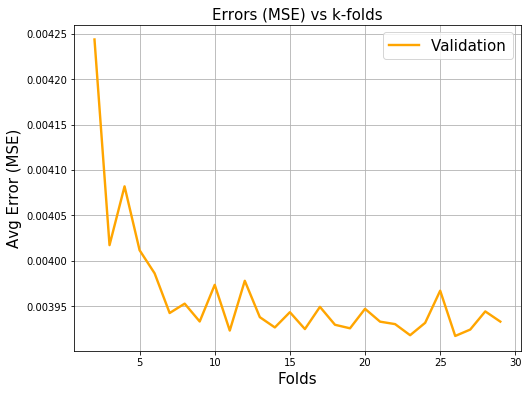

In [364]:
print("K-fold using ridge's regression")
kFold("AdmissionDataset/data.csv",percent=80,lambdaV=10)

### Leave-one-out cross-validation (LOOCV)

In this approach, we reserve only one data point from the available dataset, and train the model on the rest of the data. This process iterates for each data point. This also has its own advantages and disadvantages. Let’s look at them:

* We make use of all data points, hence the bias will be low
* We repeat the cross validation process n times (where n is number of data points) which results in a higher execution time
* This approach leads to higher variation in testing model effectiveness because we test against one data point. So, our estimation gets highly influenced by the data point. If the data point turns out to be an outlier, it can lead to a higher variation. <br>
* This can be easily observed from the graph drawn below showing the prediction error of each of the example(when used to validate) as it leads to a high variation compared to that of average error in k-fold cross validation.

**Gives high variance, may lead to overfitting over the training data**

In [346]:
def leaveOneOut(trainFile,percent,lambdaV=10,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile)
    data=data.sample(frac=1).values
    independentVariable=[0]+independentVariable
    
    train,testFinal=splitTrainTest(data,percent)
    
    if testFile:
        testFinal=pd.read_csv(testFile).values
    
    train[:,0]=1
    plt.figure(figsize=(8,6))
    ######################### K-Folds #####################

    kValues=[len(train)]
    kFoldAvgError=[]
    for k in kValues:
#         print(k)
        mseErrorsValid=[]
        mseErrorsTrain=[]
        
        kf = KFold(n_splits=k)
        kf.get_n_splits(train)
        
        for train_index, test_index in kf.split(train):
            testY=train[test_index,targetIndex]
            trainY=train[train_index,targetIndex]
            trainX=train[train_index]
            trainX=trainX[:,independentVariable]
            testX=train[test_index]
            testX=testX[:,independentVariable]

            y=np.transpose(np.matrix(trainY))
            X=np.matrix(trainX)
            XT=np.transpose(X)
            iden=np.identity(XT.shape[0])*lambdaV
            iden[0][0]=0
            inverse=np.linalg.inv(XT*X+iden)
            coefficents=inverse*XT*y
            predictedValid=np.array(testX*coefficents)
            mse=MSE(testY,predictedValid)
            mseErrorsValid.append(mse)
            plt.plot([i for i in range(100)],[mse]*100,color="cyan",linewidth="2.4")
        kFoldAvgError.append(np.average(mseErrorsValid))
    ######################### K-Folds #####################
    print("Average Error(MSE): ",kFoldAvgError)
    
#     plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.title("Leave one out cross validation",fontsize=15)
    plt.ylabel("Error (MSE)")
#     plt.xlabel("Folds")
    plt.grid(True)
    plt.plot([i for i in range(100)],kFoldAvgError*100,color="black",linewidth="2.4",label="Average Error")
#     plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    plt.legend(loc=0,fontsize=15)
    plt.show()


Average Error(MSE):  [0.003968248381060009]


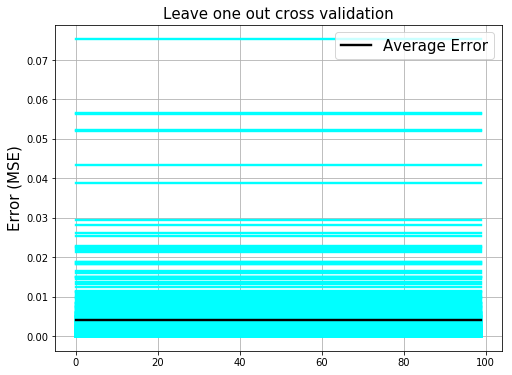

In [347]:
leaveOneOut("AdmissionDataset/data.csv",80)

#### Error(MSE) for each of the training example when used for testing in LOOCV represented by horizontal lines (cyan color) and average of all the errors shown by black horizotal line.